# TASK #1: IMPORT LIBRARIES AND DATASET

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
# Load dataset 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


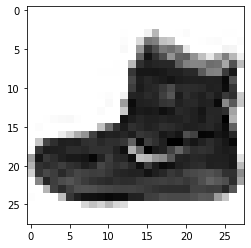

In [4]:
# Visualize a sample image
plt.imshow(X_train[0], cmap='binary')

In [5]:
# check out the shape of the training data
X_train.shape

(60000, 28, 28)

In [6]:
# check out the shape of the testing data
X_test.shape

(10000, 28, 28)

# TASK #2: PERFORM DATA VISUALIZATION

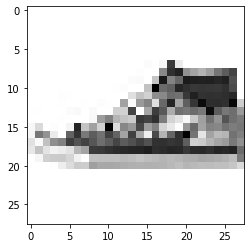

In [7]:
# Let's view some images!
i = random.randint(1, 60000)

plt.imshow(X_train[i], cmap='binary')

In [8]:
label = y_train[i]
print(label)


7


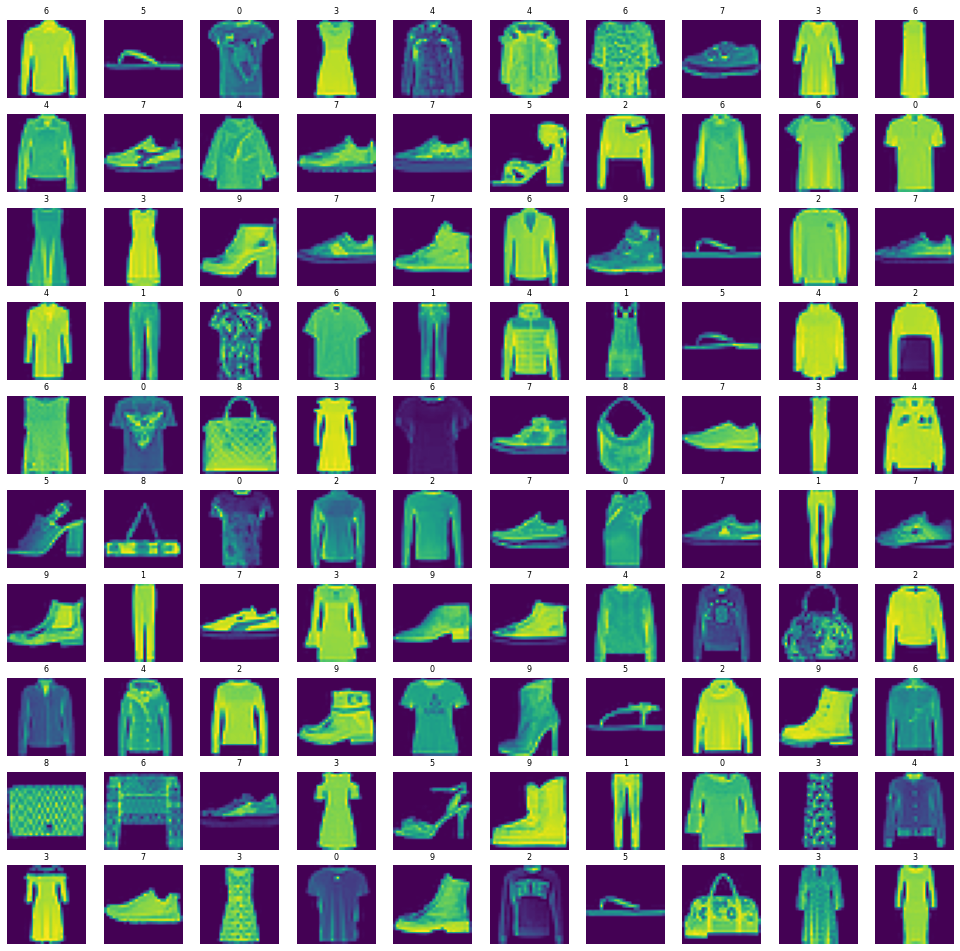

In [10]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index],fontsize=8)
    axes[i].axis('off')


# TASK #3: PERFORM DATA PREPROCESSING

In [11]:
# normalize data
X_train = X_train / 255.
X_test = X_test / 255.

In [17]:
# add some noise
noise_factor = 0.3
X_train_noisy =  X_train + np.random.rand(60000, 28, 28)*noise_factor
X_train_noisy = np.clip(X_train_noisy, 0., 1.)

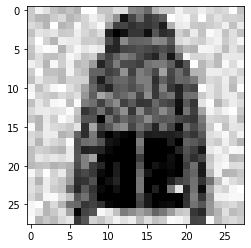

In [19]:
plt.imshow(X_train_noisy[22], cmap='binary')

In [ ]:
'''
noise_factor = .3
noisy_dataset = []
for img in X_train:
    noisy_img = img + noise_factor * np.random.randn(*img.shape)
    noisy_img = np.clip(noisy_image, 0, 1)
    noisy_dataset.append(noisy_img)
'''

In [20]:
# add noise to testing dataset
X_test_noisy =  X_test + np.random.rand(10000, 28, 28)*noise_factor
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# TASK #4: BUILD AND TRAIN AUTOENCODER DEEP LEARNING MODEL

In [26]:
autoencoder = tf.keras.models.Sequential()

#encoder
autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding='same', input_shape=(28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding='same'))

autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding='same'))

# Decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding='same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, padding='same', activation='sigmoid'))

In [27]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [29]:
autoencoder.fit(X_train_noisy.reshape(-1, 28, 28, 1),
               X_train.reshape(-1, 28, 28, 1),
               epochs = 10,
               batch_size = 200,
               validation_data = (X_test_noisy.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

Epoch 1/10
300/300 [==============================] - 1s 5ms/step - loss: 0.3896 - val_loss: 0.3120
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3009 - val_loss: 0.2968
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2903 - val_loss: 0.2889
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2848 - val_loss: 0.2851
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2813 - val_loss: 0.2819
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2785 - val_loss: 0.2795
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2766 - val_loss: 0.2780
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2753 - val_loss: 0.2770
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2744 - val_loss: 0.2761
Epoch 10/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2737 - val_loss: 0.2756

# TASK #5: EVALUATE TRAINED MODEL PERFORMANCE

In [31]:
evaluation = autoencoder.evaluate(X_test_noisy.reshape(-1,28,28,1), X_test.reshape(-1, 28,28,1))
print('Test Accuracy: {:.3f}'.format(evaluation))

313/313 [==============================] - 1s 2ms/step - loss: 0.2756
Test Accuracy: 0.276


In [32]:
predicted = autoencoder.predict(X_test_noisy[:10].reshape(-1,28,28,1))

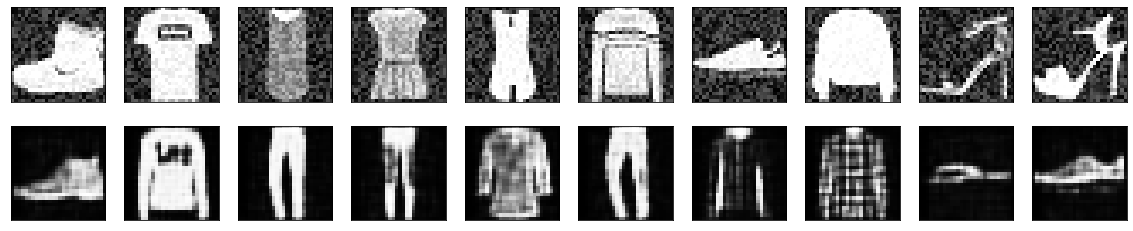

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([X_train_noisy[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# EXCELLENT WORK!

- 0 = T-shirt/top
- 1 = Trouser
- 2 = Pullover
- 3 = Dress
- 4 = Coat
- 5 = Sandal
- 6 = Shirt
- 7 = Sneaker
- 8 = Bag
- 9 = Ankle boot